# Problem Statement
In today's competitive job market, accurately determining an employee's salary based on their qualifications is crucial for both employers and employees. We aim to develop a predictive model that can estimate an employee's salary based on their years of experience, test score, and interview score.

## Model Dependencies:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle as pk

## DataImport

In [7]:
df= pd.read_csv('data.csv')

In [8]:
df.shape

(8, 4)

In [9]:
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


##  Explore and Analyze Data (EDA):

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       6 non-null      object 
 1   test_score       7 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [11]:
df.describe(percentiles=None, include="all", exclude=None)

,experience,test_score,interview_score,salary
count,6,7.000000,8.000000,8.00000
unique,6,NaN,NaN,NaN
top,five,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,7.857143,7.875000,63000.00000
std,NaN,1.345185,1.642081,11501.55269
min,NaN,6.000000,6.000000,45000.00000
25%,NaN,7.000000,6.750000,57500.00000
50%,NaN,8.000000,7.500000,63500.00000
75%,NaN,8.500000,9.250000,70500.00000


## Handle missing data

In [12]:
df.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

In [13]:
df['experience'].fillna(0, inplace=True)

In [14]:
df['test_score'].fillna(df['test_score'].mean(), inplace=True)

In [15]:
df.isnull().sum()

experience         0
test_score         0
interview_score    0
salary             0
dtype: int64

### Visualize data

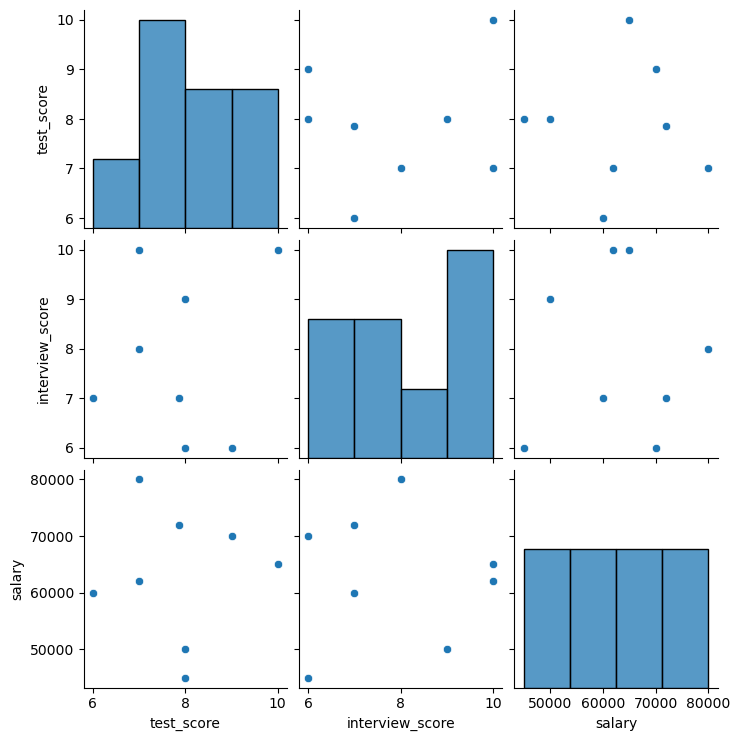

In [16]:
sns.pairplot(df)

In [19]:
cor = df.iloc[:, 1:4]
cor

,test_score,interview_score,salary
0,8.000000,9,50000
1,8.000000,6,45000
2,6.000000,7,60000
3,10.000000,10,65000
4,9.000000,6,70000
5,7.000000,10,62000
6,7.857143,7,72000
7,7.000000,8,80000


<Axes: >

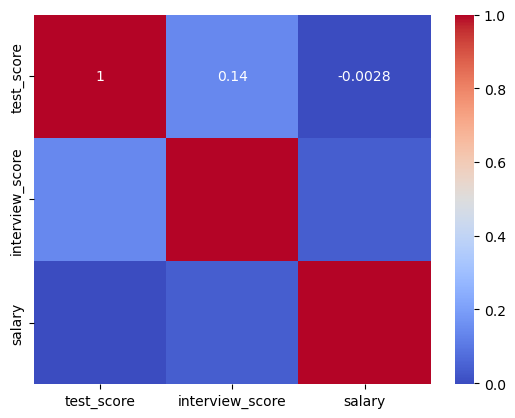

In [20]:
sns.heatmap(cor.corr(),annot=True,cmap="coolwarm")

## Encoding and Decoding

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       8 non-null      object 
 1   test_score       8 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [25]:
df['experience'].value_counts()

experience
0         2
five      1
two       1
seven     1
three     1
ten       1
eleven    1
Name: count, dtype: int64

In [26]:
def convert_to_int(word):
    word_dict = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8,
                'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0: 0}
    return word_dict[word]

df['experience'] = df['experience'].apply(lambda df : convert_to_int(df))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       8 non-null      int64  
 1   test_score       8 non-null      float64
 2   interview_score  8 non-null      int64  
 3   salary           8 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 384.0 bytes


In [28]:
df['experience'].value_counts()

experience
0     2
5     1
2     1
7     1
3     1
10    1
11    1
Name: count, dtype: int64

In [29]:
df

,experience,test_score,interview_score,salary
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [30]:
df.shape

(8, 4)

## Feature Engineering

In [31]:
x=df.drop("salary",axis=1)
y=df["salary"]

#### split data

In [32]:
x_train ,x_test,y_train,y_test=train_test_split(x,y,   test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6, 3)
(6,)
(2, 3)
(2,)


## Data Preprocessing

In [52]:
sc =StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [53]:
x_test

array([[ 0.92717265,  1.06904497, -1.56524758],
       [ 1.72189206,  0.15272071, -0.89442719]])

In [54]:
x_train

array([[-0.92717265,  0.26726124, -1.56524758],
       [-0.92717265,  0.26726124,  0.4472136 ],
       [ 0.39735971, -1.33630621, -0.89442719],
       [-0.13245324, -0.53452248,  1.11803399],
       [-0.39735971,  1.87082869,  1.11803399],
       [ 1.98679854, -0.53452248, -0.2236068 ]])

## Choose a Model && Train the Model

In [55]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
y_pd=lr.predict(x_test)

In [57]:
y_pd

array([67891.82763744, 77153.9800467 ])

## Evaluate the Model

In [58]:
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [59]:
score = compute_accuracy(y_test, y_pd)  
print(score)  

0.0


In [60]:
y_test


4    70000
6    72000
Name: salary, dtype: int64

In [61]:
y_pd

array([67891.82763744, 77153.9800467 ])

## Data Visualization

Text(0, 0.5, 'y_pd')

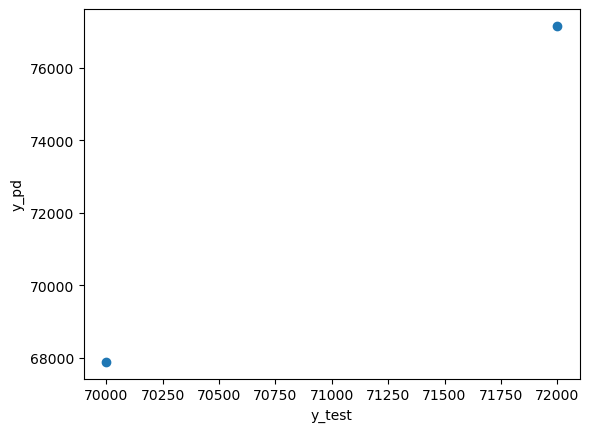

In [62]:
plt.scatter(y_test,y_pd)
plt.xlabel("y_test")
plt.ylabel("y_pd")

##  Save Model

In [63]:
import os

In [70]:
dir=r"byteStream"
file_path="SRS_Model.pkl"
file_path=os.path.join(dir,file_path)
pk.dump(lr,open(file_path,"wb"))

In [71]:
pk.dump(sc,open("byteStream\scDump.pkl","wb"))

## Data Refinement

In [72]:
pk.load(open("byteStream\scDump.pkl","rb"))

StandardScaler()

#### user input

In [73]:
experience=6
test_score=6
interview_score=6

In [74]:
user_list=[experience,	test_score,	interview_score]
user_list

[6, 6, 6]

In [75]:
label=["experience","test_score","interview_score"]
label

['experience', 'test_score', 'interview_score']

In [76]:
user_data =pd.DataFrame([user_list],columns=label);

In [77]:
user_data 

,experience,test_score,interview_score
0,6,6,6


In [78]:
uinput=sc.transform(user_data)

## Model Deployment

### Create a Catchy App or Web Application